In [48]:
import pandas as pd
import numpy as np
import pandas as pd
import re
from collections import Counter
pd.set_option('display.max_columns', 500)

data = pd.read_excel('data/anonymized_Learner_Corpus.xlsx')
data

LEARNER ID    Major  Age Term 1 Instructor Term 2 Instructor  \
0         10576  Nursing   18          Instr026          Instr055   
1         10553  Nursing   18          Instr044          Instr033   
2         10170      AMS   18          Instr031          Instr057   
3         10599  Nursing   18          Instr006          Instr023   
4         10244  Nursing   18          Instr046          Instr031   
..          ...      ...  ...               ...               ...   
152       10129      Med   18          Instr038          Instr060   
153       10148      Med   17          Instr046          Instr031   
154       10339      Med   19          Instr046          Instr031   
155       10266      AMS   18          Instr031          Instr057   
156       10645  Nursing   20          Instr044          Instr033   

    Term 3 Instructor Term 4 Instructor Mother's native language  \
0            Instr015          Instr019                   Arabic   
1            Instr049          Instr050                   Arabic   
2            Instr041          Instr052                   Arabic   
3            Instr023          Instr049                   Arabic   
4            Instr008          Instr044                   Arabic   
..                ...               ...                      ...   
152          Instr031          Instr045                   Arabic   
153          Instr008          Instr045                   Arabic   
154          Instr008          Instr014                   Arabic   
155          Instr041          Instr015                   Arabic   
156          Instr049          Instr050                   Arabic   

           Languages spoken at home Primary school language  \
0                           Arabic                   Arabic   
1                           Arabic                   Arabic   
2                           Arabic                   Arabic   
3                           Arabic                   Arabic   
4    Mostly Arabic and some English                  Arabic   
..                              ...                     ...   
152                         Arabic                  English   
153  Mostly English and some Arabic                 English   
154                         Arabic                   Arabic   
155                         Arabic                   Arabic   
156  Mostly Arabic and some English     Arabic and English    

    Secondary school language English Instruction   \
0                      Arabic                  NaN   
1                      Arabic                    9   
2                      Arabic           7-10 years   
3         Arabic and English            7-10 years   
4                      Arabic           7-10 years   
..                        ...                  ...   
152                   English                   15   
153                   English          11-13 years   
154                    Arabic                   12   
155                    Arabic          11-13 years   
156       Arabic and English                    13   

    Stay in an English speaking country Other foreign languages  \
0                                  None                    None   
1                                  None                    None   
2                                  None                    None   
3                                  None                    None   
4                                  None                    None   
..                                  ...                     ...   
152                                None                  French   
153                          six years                     None   
154                         three years                    None   
155                                None                    None   
156                                None                  French   

    Reference tools use Reference tools Which bilingual dictionary?  \
0                   Yes       Grammarly                        None   
1     

In [96]:
data.columns

Index(['LEARNER ID', 'Major', 'Age', 'Term 1 Instructor', 'Term 2 Instructor',
       'Term 3 Instructor', 'Term 4 Instructor', 'Mother's native language',
       'Languages spoken at home', 'Primary school language',
       'Secondary school language', 'English Instruction ',
       'Stay in an English speaking country', 'Other foreign languages',
       'Reference tools use', 'Reference tools', 'Which bilingual dictionary?',
       'Which monolingual dictionary?', 'grammar references',
       'Practice Paragraph', 'Task 1.1.1', 'Task 1.1.2', 'Task 1.2.1',
       'Task 1.2.2', 'Task 2.1.1', 'Task 2.1.2', 'Task 2.2.1', 'Task 2.2.2',
       'Exam Term 2', 'Essay 3.1.1', 'Essay 3.1.2', 'Essay 3.2.1',
       'Essay 3.2.2', 'Exam Term 3', 'Task 4.1', 'Task 4.2', 'Task 4.3',
       'Practice Paragraph_word_count', 'Task 1.1.1_word_count',
       'Task 1.1.2_word_count', 'Task 1.2.1_word_count',
       'Task 1.2.2_word_count', 'Task 2.1.1_word_count',
       'Task 2.1.2_word_count', 'Task 2.

In [100]:
text_columns = [
       'Practice Paragraph', 'Task 1.1.1', 'Task 1.1.2', 'Task 1.2.1',
       'Task 1.2.2', 'Task 2.1.1', 'Task 2.1.2', 'Task 2.2.1', 'Task 2.2.2',
       'Exam Term 2', 'Essay 3.1.1', 'Essay 3.1.2', 'Essay 3.2.1',
       'Essay 3.2.2', 'Exam Term 3', 'Task 4.1', 'Task 4.2', 'Task 4.3',
]

In [113]:
import os

def mistakes_data_analysis(file, text_columns, output_folder = 'analysis', output_filename = 'mistakes.csv'):
    """"
    # TODO: write proper summary of how to use this function
    """
    data = pd.read_excel(file)

    all_mistakes_list = []

    for column in text_columns:
        if column in data.columns:
            for text_id, text in zip(data['Major'],  data[column].dropna()):
                if not pd.isnull(text):

                    corrected_text = re.sub(r"<original=([^>']+)>", r"<original='\1'>", text)

                    mistakes = re.findall(r"<original='([^']+)'>([^<]+)</original>", corrected_text)

                    all_mistakes_list.extend([{'Major': text_id, "Original":mistake[0], 'Corrected':mistake[1] } for mistake in mistakes])

    mistakes_data = pd.DataFrame(all_mistakes_list, columns=['Major', 'Original', 'Corrected'])

    os.makedirs(output_folder, exist_ok=True)

    output_path = os.path.join(output_folder, output_filename)
    mistakes_data.to_csv(output_path, index=False, header=True)

    return mistakes_data


In [114]:
mistakes_data_analysis('data/anonymized_Learner_Corpus.xlsx', text_columns)

Major      Original       Corrected
0     Nursing      producis        products
1     Nursing         Times           teams
2     Nursing          Coll            call
3     Nursing          live            life
4     Nursing          sand            send
...       ...           ...             ...
8122  Nursing          whit            with
8123      Med        enemia          anemia
8124      Med       preform         perform
8125      Med      standers       standards
8126      Med  implemention  implementation

[8127 rows x 3 columns]

In [49]:
def extract_tag(text):
    """
    This function is helping to change the tag from ....
    Example:
        <original=universty>university</original> needs to be corrected to <original='universty'>university</original>
    """
    if pd.isnull(text):
        return text
    corrected_text = re.sub(r"<original=([^>']+)>", r"<original='\1'>", text)
    return corrected_text

In [50]:
# cleaning
text_columns = [
       'Practice Paragraph', 'Task 1.1.1', 'Task 1.1.2', 'Task 1.2.1',
       'Task 1.2.2', 'Task 2.1.1', 'Task 2.1.2', 'Task 2.2.1', 'Task 2.2.2',
       'Exam Term 2', 'Essay 3.1.1', 'Essay 3.1.2', 'Essay 3.2.1',
       'Essay 3.2.2', 'Exam Term 3', 'Task 4.1', 'Task 4.2', 'Task 4.3',
]

for column in text_columns:
    data[column] = data[column].apply(extract_tag)

In [51]:
# extracting mistakes
def extract_mistakes(text_id, text):
    if pd.isnull(text):
        return []
    mistakes = re.findall(r"<original='([^']+)'>([^<]+)</original>", text)
    return ({(text_id, mistake[0], mistake[1]) for mistake in mistakes})

In [52]:
# exracting all mistakes

all_mistakes_list = []

for column in text_columns:
    if column in data.columns:
        for text_id, text in zip(data['Major'],  data[column].dropna()):
            all_mistakes_list.extend(extract_mistakes(text_id, text))

In [53]:
all_mistakes_list[:10]

[('Nursing', 'In deed', 'indeed'),
 ('nursing', 'it’s', 'its'),
 ('Nursing', 'tray', 'try'),
 ('Med', 'every day', 'everyday'),
 ('Med', 'Do', 'Due to'),
 ('Med', 'them selfs', 'themselves'),
 ('Med', 'drive’s', 'driver’s'),
 ('Med', 'instant', 'instance'),
 ('Nursing', 'form', 'from'),
 ('Nursing', 'front', 'font')]

In [54]:
mistakes_data = pd.DataFrame(all_mistakes_list, columns=['Major', 'Original', 'Corrected'])
mistakes_data

Major      Original       Corrected
0     Nursing       In deed          indeed
1     nursing          it’s             its
2     Nursing          tray             try
3         Med     every day        everyday
4         Med            Do          Due to
...       ...           ...             ...
5906  Nursing          whit            with
5907      Med       preform         perform
5908      Med  implemention  implementation
5909      Med        enemia          anemia
5910      Med      standers       standards

[5911 rows x 3 columns]

# Mistakes analysis

In [98]:
import os

def mistakes_data_analysis(file, text_columns, output_folder = 'analysis', output_filename = 'mistakes.csv'):
    """"
    # TODO: write proper summary of how to use this function
    """
    data = pd.DataFrame(file)

    all_mistakes_list = []

    for column in text_columns:
        if column in data.columns:
            for text_id, text in zip(data['Major'],  data[column].dropna()):
                if not pd.isnull(text):

                    corrected_text = re.sub(r"<original=([^>']+)>", r"<original='\1'>", text)

                    mistakes = re.findall(r"<original='([^']+)'>([^<]+)</original>", corrected_text)

                    all_mistakes_list.extend([{'Major': text_id, "Original":mistake[0], 'Corrected':mistake[1] } for mistake in mistakes])

    mistakes_data = pd.DataFrame(all_mistakes_list, columns=['Major', 'Original', 'Corrected'])

    os.mkdir(output_folder, exist_ok=True)

    output_path = os.path.join(output_folder, output_filename)
    mistakes_data.to_csv(output_path, index=False, header=True)

    return mistakes_data


In [55]:
re.sub(r"<[^>]+>|[^\w\s']", "", "!it/'s!") # if I remember correctly this should only keep words and remove everything else

"it's"

In [56]:
data['Exam Term 2'][1]

"<title>summer season Vs winter season</title>\n\nThere are many differences between summer season and winter season. The first <original='diffirences'>difference</original> between summer and winter is clothes. for example, the clothes in summer season make to one <original='flor'>layer</original>, <original='wheil'>while</original> the clothes in winter is heavy and is make to <original='twear'>wear</original> more <original='flor'>layers</original>. The summer can wear <original='anythink'>anything</original>, <original='wheil'>while</original> in winter is can not. The next differences is <original='tmpreger'>temprature</original>. For example, <original='tmpreger'>temprature</original> in summer is up <original='wheil'>while</original> in winter is down. The lastly differences is <original='atmpher'>atmosphere</original>. For example, the air in summer is so nice <original='wheil'>while</original>  the air in winter is a cold and strong. The water <original='beatch'>bitch</origina

In [57]:
# count how many words did each stude produce

def word_count(text):
    if pd.isnull(text):
        return 0
    cleaned_text = re.sub(r"<[^>]+>|[^\w\s']", "", text) # removes HTML tags and non-word characters except spaces and apostrophes
    cleaned_text = cleaned_text.replace('\n', ' ').strip() # replacing newline (\n) characters with spaces
    words = cleaned_text.split()
    return len(words)

In [58]:
text_columns = ['Practice Paragraph', 'Task 1.1.1', 'Task 1.1.2', 'Task 1.2.1',
       'Task 1.2.2', 'Task 2.1.1', 'Task 2.1.2', 'Task 2.2.1', 'Task 2.2.2',
       'Exam Term 2', 'Essay 3.1.1', 'Essay 3.1.2', 'Essay 3.2.1',
       'Essay 3.2.2', 'Exam Term 3', 'Task 4.1', 'Task 4.2', 'Task 4.3']

len(text_columns)

18

In [59]:
# ['Practice Paragraph', 'Task 1.1.1', 'Task 1.1.2', 'Task 1.2.1',
#        'Task 1.2.2', 'Task 2.1.1', 'Task 2.1.2', 'Task 2.2.1', 'Task 2.2.2',
#        'Exam Term 2', 'Essay 3.1.1', 'Essay 3.1.2', 'Essay 3.2.1',
#        'Essay 3.2.2', 'Exam Term 3', 'Task 4.1', 'Task 4.2', 'Task 4.3']

In [60]:
student_words_count = {}

for column in text_columns:
    if column in data.columns:
        data[column + '_word_count'] = data[column].apply(word_count)

In [61]:
data.head(3)

LEARNER ID    Major  Age Term 1 Instructor Term 2 Instructor  \
0       10576  Nursing   18          Instr026          Instr055   
1       10553  Nursing   18          Instr044          Instr033   
2       10170      AMS   18          Instr031          Instr057   

  Term 3 Instructor Term 4 Instructor Mother's native language  \
0          Instr015          Instr019                   Arabic   
1          Instr049          Instr050                   Arabic   
2          Instr041          Instr052                   Arabic   

  Languages spoken at home Primary school language Secondary school language  \
0                  Arabic                   Arabic                    Arabic   
1                  Arabic                   Arabic                    Arabic   
2                  Arabic                   Arabic                    Arabic   

  English Instruction  Stay in an English speaking country  \
0                  NaN                                None   
1                    9                                None   
2           7-10 years                                None   

  Other foreign languages Reference tools use Reference tools  \
0                    None                 Yes       Grammarly   
1                    None                 Yes          Google   
2                    None                 Yes      Dictionary   

  Which bilingual dictionary? Which monolingual dictionary?  \
0                        None                          None   
1                     Oxford                         Oxford   
2                     Oxford     Merriam Webster and Oxford   

  grammar references                                 Practice Paragraph  \
0               None  One way to shop from home is to use a virtual ...   
1               None   \n\n \n\n<title>In what ways did smartphones ...   
2          textbooks  <title>Advantages of Travelling</title> \n \n ...   

  Task 1.1.1                                         Task 1.1.2 Task 1.2.1  \
0        NaN  <title>Reasons for Buying an IPad:</title> \n\...        NaN   
1        NaN  <title>Reasons for having /Buying an iPad<titl...        NaN   
2        NaN   <title>Advantages of Travelling</title>\n \n ...        NaN   

                                          Task 1.2.2  \
0  <title>Causes of Eating Disorders Among Young ...   
1  <title>The effects of daily exercise<title>\n\...   
2  <title>Causes of Eating Disorders Among Young ...   

                                          Task 2.1.1  \
0  There are many differences between WhatsApp ap...   
1  <title>Twitter vs WhatsApp<title>\n\nMany peop...   
2   \n <title>Role of a father vs the role of a m...   

                                          Task 2.1.2  \
0  There are many differences between the WhatsAp...   
1  <title>Twitter vs WhatsApp<title> \n\n \n\nMan...   
2   \n<title>Role of a father vs the role of a mo...   

                                          Task 2.2.1  \
0                                                NaN   
1  <title>Swimming<title> \n \n \n" Swimming is o...   
2   <title>An Ideal friend</title> \n \n \nAn ide...   

                                          Task 2.2.2  \
0  <title>Drawing</title> \n\n\nDrawing is a Visi...   
1  <title>Swimming<title>  \n \n" To move in the ...   
2   <title>An Ideal Friend</title> \n \n \nAn ide...   

                                         Exam Term 2  \
0                                                NaN   
1  <title>summer season Vs winter season</title>\...   
2                                                NaN   

                                         Essay 3.1.1  \
0                                                NaN   
1  <title>Is it important to study a foreign lang...   
2   <title>Providing Textbooks for free</title> \...   

                                         Essay 3.1.2  \
0  <title>Is it Important to Study a Foreign Lang...   
1  <title>Is It Important to Study a Foreign Lang...   
2   <title>Providing Textboo

In [62]:
data['Essay 3.1.2'][0]

"<title>Is it Important to Study a Foreign Language? Why? Or Why Not?</title> \n\nBeing able to communicate with someone in their own language is amazing. Bilinguals have the unique opportunity to communicate with a wide range of people in their personal and professional lives. Learning languages can make you better in communication skills \n\nIn my opinion, I think that learning a foreign language is important because it can make your mental abilities better and it advances your career. \n\n \n\nTo begin, with the development of mental abilities, Numerous studies have shown that bilinguals have better mental abilities than monolinguals because learning languages helps a lot in improving memory, and disease prevention. \n\nFirst, <in_text_reference>[1]</in_text_reference> improving memory Studying a language engages memorization skills and recall, Memorizing and remembering is like an exercise for memory. With the continuation of this process, the memory will become stronger. \n\nThere

In [63]:
text_test = """
"<title>Is it Important to Study a Foreign Language? Why? Or Why Not?</title> \n\nBeing able to communicate with someone in their own language is amazing.
Bilinguals have the unique opportunity to communicate with a wide range of people in their personal and professional lives. Learning languages can make you better
in communication skills \n\nIn my opinion, I think that learning a foreign language is important because it can make your mental abilities better and it advances
your career. \n\n \n\nTo begin, with the development of mental abilities, Numerous studies have shown that bilinguals have better mental abilities than monolinguals
because learning languages helps a lot in improving memory, and disease prevention. \n\nFirst, <in_text_reference>[1]</in_text_reference> improving memory
Studying a language engages memorization skills and recall, Memorizing and remembering is like an exercise for memory. With the continuation of this process,
the memory will become stronger. \n\nTherefore, we see that many language speakers have strong memory. \n\nSecond, it can also help you with disease prevention.
Learning languages can protect you from some diseases, <in_text_reference>[2]</in_text_reference>such as Alzheimer's, because of the skills used in the process of
memorizing and remembering, as they strengthen memory, and therefore they protect against Alzheimer's, and many studies and researchers have proven this in their
research these two reasons, I believe that learning languages is important \n\n \n\nSecond, it will Advance Your Career, Speaking two or more languages can make
companies need you, as well as it can make your workplace pay you a higher salary First, tempting incentives there is strong competition between companies,
as companies seek internationalism, and one of the ways that help them reach their goal are employees who can speak more than one language.
Companies seek to attract this type of employee and offer them attractive offers. Many companies offer special benefits and support
for employees Who can speak more than one language Such as Providing In-Language Training. Second higher salary,
Many bilinguals at work get a higher salary than their co-workers. \n\nIn addition, different languages have different salaries,
depending on their importance in the workplace. Because of these two points I believe in learning languages will advance your
career \n\n \n\nTo develop your career and develop your mental abilities, you can learn another language. \n\n \n\n In conclusion,
learning foreign languages \u200b\u200bis useful and important, as it has been proven that learning languages \u200b\u200bcan
develop mental abilities such as memorization and prevent diseases such as Alzheimer’s, also learning languages \u200b\u200bis
required in professional life as companies offer attractive incentives and high salaries to employees who speak two languages \u200b\u200bor  more،
In my opinion, I think that learning a second  language is very important and I think that parents and <original='school'>schools</original>
should teach the children a second language because children are much better than adults in learning a new
language \n\n \n\n \n\n \n\n<reference_list>References \n\n1 \n\nA bilingual advantage for episodic memory
in older adults\u202f(2012)\u202fJournal of cognitive psychology (Hove, England). U.S. National
Library of Medicine. Available at: https://pubmed.ncbi.nlm.nih.gov/23175648/
(Accessed: April 5, 2023).\u202f \n\n2 \n\nAuthor links open overlay panelHilary D. Duncan a b\u202fet al.\u202f(2017)\u202fStructural brain
differences between monolingual and multilingual patients with mild cognitive impairment and alzheimer disease: Evidence for cognitive reserve,\u202fNeuropsychologia.
Pergamon. Available at: https://www.sciencedirect.com/science/article/abs/pii/S0028393217305109 (Accessed: April 5, 2023).</reference_list>"
"""

In [120]:
def student_words_count(text):
    """
    #TODO: docstrings to explain what this function is doing
    """
    cleaned_text = re.sub(r'<reference_list>.*?</reference_list>', '', text, flags=re.DOTALL)
    cleaned_text = re.sub(r"<[^>]+>|[^\w\s']", "", cleaned_text)
    cleaned_text = cleaned_text.replace('\n', ' ').strip()
    words = cleaned_text.split()
    return words

In [118]:
text_test_count = student_words_count(text_test)
len(text_test_count)

530

In [119]:
text_test_count[-20:]

['with',
 'mild',
 'cognitive',
 'impairment',
 'and',
 'alzheimer',
 'disease',
 'Evidence',
 'for',
 'cognitive',
 'reserve',
 'Neuropsychologia',
 'Pergamon',
 'Available',
 'at',
 'httpswwwsciencedirectcomsciencearticleabspiiS0028393217305109',
 'Accessed',
 'April',
 '5',
 '2023']

In [121]:
text_test_count_v2 = student_words_count(text_test)
len(text_test_count_v2)

459

In [122]:
text_test_count_v2[-20:]

['schools',
 'should',
 'teach',
 'the',
 'children',
 'a',
 'second',
 'language',
 'because',
 'children',
 'are',
 'much',
 'better',
 'than',
 'adults',
 'in',
 'learning',
 'a',
 'new',
 'language']

In [132]:
def calculate_word_counts(file, text_columns, output_folder = 'analysis', output_filename = 'word_count.csv', include_reference = False):
    """
    # TODO: description for this function
    """
    data = pd.read_excel(file)

    def student_words_count(text):
        """
        #TODO: docstrings to explain what this function is doing
        """
        if pd.isnull(text):
            return 0
        cleaned_text = re.sub(r'<reference_list>.*?</reference_list>', '', text, flags=re.DOTALL)
        cleaned_text = re.sub(r"<[^>]+>|[^\w\s']", "", cleaned_text)
        cleaned_text = cleaned_text.replace('\n', ' ').strip()
        words = cleaned_text.split()
        return len(words)

    def word_count(text):
        """
        #TODO: docstrings to explain what this function is doing
        """
        if pd.isnull(text):
            return 0
        cleaned_text = re.sub(r"<[^>]+>|[^\w\s']", "", text) # removes HTML tags and non-word characters except spaces and apostrophes
        cleaned_text = cleaned_text.replace('\n', ' ').strip() # replacing newline (\n) characters with spaces
        words = cleaned_text.split()
        return len(words)

    if include_reference == False:
        for column in text_columns:
            if column in data.columns:
                data[column + '_word_count'] = data[column].apply(student_words_count)

        data['Total_Word_Count'] = data[[col + '_word_count' for col in text_columns]].sum(axis = 1)
    else:
        for column in text_columns:
            if column in data.columns:
                data[column + '_word_count'] = data[column].apply(word_count)

        data['Total_Word_Count'] = data[[col + '_word_count' for col in text_columns]].sum(axis = 1)

    os.makedirs(output_folder, exist_ok=True)
    output_path = os.path.join(output_folder, output_filename)
    data.to_csv(output_path, index=False, header=True)

    return data


In [135]:
calculate_word_counts('data/anonymized_Learner_Corpus.xlsx', text_columns)

LEARNER ID    Major  Age Term 1 Instructor Term 2 Instructor  \
0         10576  Nursing   18          Instr026          Instr055   
1         10553  Nursing   18          Instr044          Instr033   
2         10170      AMS   18          Instr031          Instr057   
3         10599  Nursing   18          Instr006          Instr023   
4         10244  Nursing   18          Instr046          Instr031   
..          ...      ...  ...               ...               ...   
152       10129      Med   18          Instr038          Instr060   
153       10148      Med   17          Instr046          Instr031   
154       10339      Med   19          Instr046          Instr031   
155       10266      AMS   18          Instr031          Instr057   
156       10645  Nursing   20          Instr044          Instr033   

    Term 3 Instructor Term 4 Instructor Mother's native language  \
0            Instr015          Instr019                   Arabic   
1            Instr049          Instr050                   Arabic   
2            Instr041          Instr052                   Arabic   
3            Instr023          Instr049                   Arabic   
4            Instr008          Instr044                   Arabic   
..                ...               ...                      ...   
152          Instr031          Instr045                   Arabic   
153          Instr008          Instr045                   Arabic   
154          Instr008          Instr014                   Arabic   
155          Instr041          Instr015                   Arabic   
156          Instr049          Instr050                   Arabic   

           Languages spoken at home Primary school language  \
0                           Arabic                   Arabic   
1                           Arabic                   Arabic   
2                           Arabic                   Arabic   
3                           Arabic                   Arabic   
4    Mostly Arabic and some English                  Arabic   
..                              ...                     ...   
152                         Arabic                  English   
153  Mostly English and some Arabic                 English   
154                         Arabic                   Arabic   
155                         Arabic                   Arabic   
156  Mostly Arabic and some English     Arabic and English    

    Secondary school language English Instruction   \
0                      Arabic                  NaN   
1                      Arabic                    9   
2                      Arabic           7-10 years   
3         Arabic and English            7-10 years   
4                      Arabic           7-10 years   
..                        ...                  ...   
152                   English                   15   
153                   English          11-13 years   
154                    Arabic                   12   
155                    Arabic          11-13 years   
156       Arabic and English                    13   

    Stay in an English speaking country Other foreign languages  \
0                                  None                    None   
1                                  None                    None   
2                                  None                    None   
3                                  None                    None   
4                                  None                    None   
..                                  ...                     ...   
152                                None                  French   
153                          six years                     None   
154                         three years                    None   
155                                None                    None   
156                                None                  French   

    Reference tools use Reference tools Which bilingual dictionary?  \
0                   Yes       Grammarly                        None   
1     

In [64]:
data['Total_Word_Count'] = data[[col + '_word_count' for col in text_columns]].sum(axis = 1)
data['Total_Word_Count']

0      4499
1      4816
2      5649
3      4939
4      5402
       ... 
152    6622
153    7248
154    7591
155    5109
156    5981
Name: Total_Word_Count, Length: 157, dtype: int64

In [65]:
data.head(3)

LEARNER ID    Major  Age Term 1 Instructor Term 2 Instructor  \
0       10576  Nursing   18          Instr026          Instr055   
1       10553  Nursing   18          Instr044          Instr033   
2       10170      AMS   18          Instr031          Instr057   

  Term 3 Instructor Term 4 Instructor Mother's native language  \
0          Instr015          Instr019                   Arabic   
1          Instr049          Instr050                   Arabic   
2          Instr041          Instr052                   Arabic   

  Languages spoken at home Primary school language Secondary school language  \
0                  Arabic                   Arabic                    Arabic   
1                  Arabic                   Arabic                    Arabic   
2                  Arabic                   Arabic                    Arabic   

  English Instruction  Stay in an English speaking country  \
0                  NaN                                None   
1                    9                                None   
2           7-10 years                                None   

  Other foreign languages Reference tools use Reference tools  \
0                    None                 Yes       Grammarly   
1                    None                 Yes          Google   
2                    None                 Yes      Dictionary   

  Which bilingual dictionary? Which monolingual dictionary?  \
0                        None                          None   
1                     Oxford                         Oxford   
2                     Oxford     Merriam Webster and Oxford   

  grammar references                                 Practice Paragraph  \
0               None  One way to shop from home is to use a virtual ...   
1               None   \n\n \n\n<title>In what ways did smartphones ...   
2          textbooks  <title>Advantages of Travelling</title> \n \n ...   

  Task 1.1.1                                         Task 1.1.2 Task 1.2.1  \
0        NaN  <title>Reasons for Buying an IPad:</title> \n\...        NaN   
1        NaN  <title>Reasons for having /Buying an iPad<titl...        NaN   
2        NaN   <title>Advantages of Travelling</title>\n \n ...        NaN   

                                          Task 1.2.2  \
0  <title>Causes of Eating Disorders Among Young ...   
1  <title>The effects of daily exercise<title>\n\...   
2  <title>Causes of Eating Disorders Among Young ...   

                                          Task 2.1.1  \
0  There are many differences between WhatsApp ap...   
1  <title>Twitter vs WhatsApp<title>\n\nMany peop...   
2   \n <title>Role of a father vs the role of a m...   

                                          Task 2.1.2  \
0  There are many differences between the WhatsAp...   
1  <title>Twitter vs WhatsApp<title> \n\n \n\nMan...   
2   \n<title>Role of a father vs the role of a mo...   

                                          Task 2.2.1  \
0                                                NaN   
1  <title>Swimming<title> \n \n \n" Swimming is o...   
2   <title>An Ideal friend</title> \n \n \nAn ide...   

                                          Task 2.2.2  \
0  <title>Drawing</title> \n\n\nDrawing is a Visi...   
1  <title>Swimming<title>  \n \n" To move in the ...   
2   <title>An Ideal Friend</title> \n \n \nAn ide...   

                                         Exam Term 2  \
0                                                NaN   
1  <title>summer season Vs winter season</title>\...   
2                                                NaN   

                                         Essay 3.1.1  \
0                                                NaN   
1  <title>Is it important to study a foreign lang...   
2   <title>Providing Textbooks for free</title> \...   

                                         Essay 3.1.2  \
0  <title>Is it Important to Study a Foreign Lang...   
1  <title>Is It Important to Study a Foreign Lang...   
2   <title>Providing Textboo

In [66]:
list_1 = [199, 0, 137,0,115,254,256,0,285,0,0,529,0,538,326,393,550,917]
sum(list_1)

4499

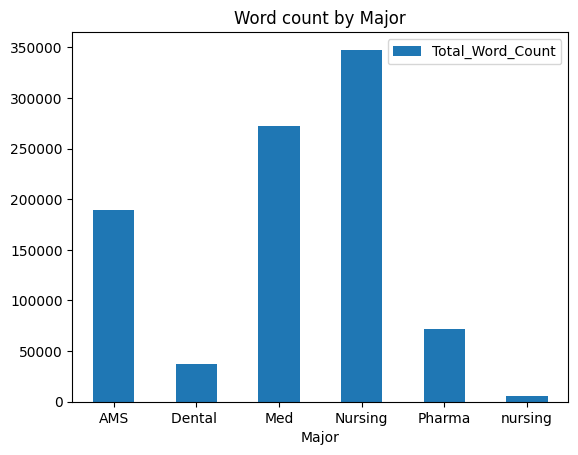

In [67]:
import matplotlib.pyplot as plt

grouped_major_word_count = data.groupby(['Major'])[['Total_Word_Count']].sum()
grouped_major_word_count.plot(kind='bar')
plt.title('Word count by Major')
plt.xticks(rotation = 0)
plt.show()

In [68]:
for column in text_columns:
    data['Practice Paragraph_word_count'].sum() / len(data)

In [69]:
text_columns

['Practice Paragraph',
 'Task 1.1.1',
 'Task 1.1.2',
 'Task 1.2.1',
 'Task 1.2.2',
 'Task 2.1.1',
 'Task 2.1.2',
 'Task 2.2.1',
 'Task 2.2.2',
 'Exam Term 2',
 'Essay 3.1.1',
 'Essay 3.1.2',
 'Essay 3.2.1',
 'Essay 3.2.2',
 'Exam Term 3',
 'Task 4.1',
 'Task 4.2',
 'Task 4.3']

# find an algoritm that is going to count the frequency of words per student

In [70]:
# from collections import Counter

# word_counter = Counter()

# for col in text_columns:
#         cleaned_text = re.sub(r"<[^>]+>|[^\w\s']", "", text)
#         cleaned_text = cleaned_text.replace('\n', ' ').strip()

#         words = cleaned_text.split()
#         word_counter.update(words)

# common_word = word_counter.most_common()
# common_word[0][:2]

In [95]:
# data.info()

In [72]:
text_columns

['Practice Paragraph',
 'Task 1.1.1',
 'Task 1.1.2',
 'Task 1.2.1',
 'Task 1.2.2',
 'Task 2.1.1',
 'Task 2.1.2',
 'Task 2.2.1',
 'Task 2.2.2',
 'Exam Term 2',
 'Essay 3.1.1',
 'Essay 3.1.2',
 'Essay 3.2.1',
 'Essay 3.2.2',
 'Exam Term 3',
 'Task 4.1',
 'Task 4.2',
 'Task 4.3']

<reference_list></reference_list>

In [73]:
combined_words = ' '.join(data[col].astype(str).str.cat(sep = ' ') for col in text_columns)
combined_words

'One way to shop from home is to use a virtual shopping mall. Another way is to use a website other. such as Craigslist - an online service that allows people to buy and sell things directly with each Many of the <original=producis>products</original> sold through Craigslist are used, not new. Craigslist users buy and sell almost every product you can imagine, from home-improvement products to gourmet items. Unlike a virtual shopping mall, Craigslist has individual sites for different cities. Someone who were more than 700 Craigslist sites in 70 countries. People can search for things on Craigslist for free (they don\'t pay anything). Most people can also advertise on Craigslist for free. Craigslist makes a profit by charging a fee - money that you pay to use a service - for only a few categories. For example, companies that want to advertise jobs or sell tickets to events usually need to pay for their advertisements. Craigslist has a huge number of users and more than 90 percent of th

In [74]:
word = re.findall(r'\b\w+\b', combined_words.lower())
word[:20]

['one',
 'way',
 'to',
 'shop',
 'from',
 'home',
 'is',
 'to',
 'use',
 'a',
 'virtual',
 'shopping',
 'mall',
 'another',
 'way',
 'is',
 'to',
 'use',
 'a',
 'website']

In [75]:
combined_test_v2 = ''

for col in text_columns:
    text_data = data[col].astype(str).str.cat(sep = ' ')
    text_data = re.sub(r'<reference_list>.*?</reference_list>', '', text_data, flags=re.DOTALL)
    combined_test_v2 = ' ' + text_data

combined_test_v2

' <title>Final Project \n\nA Review of “Stressors in University Life and Anxiety Symptoms among International Students: A Cross-sectional Study “</title> \n\n               Research has revealed that stress increases the likelihood of developing anxiety in the general population, especially university students. In order to develop effective intervention techniques, research should be conducted to discover anxiety\'s associated risks and elucidate the mechanism of interactions. Anxiety can significantly influence students\' social functioning, academic progress, and even physical health. Therefore, <in_text_reference>Wang et al. <in_text_reference> conducted this study to investigate the connection between university-life pressures and symptoms of anxiety among international students. The objectives of this study were to evaluate the most common stressors faced by international learners and the contribution of perceived stress and self-efficacy to the relationship between stressors and 

In [76]:
word_2 = re.findall(r'\b\w+\b', combined_test_v2.lower())
word_2[:20]

['title',
 'final',
 'project',
 'a',
 'review',
 'of',
 'stressors',
 'in',
 'university',
 'life',
 'and',
 'anxiety',
 'symptoms',
 'among',
 'international',
 'students',
 'a',
 'cross',
 'sectional',
 'study']

In [77]:
word_freq_v2 = Counter(word_2)

In [78]:
word_freq_d_v2 = pd.DataFrame(word_freq_v2.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
word_once = word_freq_d_v2[word_freq_d_v2['Frequency'] == 1]

word_once.to_csv('word_freq_v2.csv', header=True, index=False)

In [79]:
word_once[:50]

Word  Frequency
6113            herbs          1
6117         abitalib          1
6124           washed          1
7418           2021at          1
5845             talk          1
6122          sterile          1
6112        medicinal          1
7424          weather          1
6129          tissues          1
7423        erroneous          1
7419        almaarefa          1
7427           lezman          1
6123            gauze          1
6731          arabian          1
6120               97          1
6114      beneficials          1
7425          celsius          1
7417         almuqbil          1
6850          junyong          1
7426          raymond          1
6126            nurse          1
7422  underestimating          1
6733       occupation          1
6116             eben          1
7416          careers          1
6125           saline          1
6990        injection          1
7428           riskin          1
6084          akobeng          1
6081            bilal          1
6082        nonbiased          1
6744             zahr          1
6843  retrospectively          1
6742         alkasseh          1
7449        leisurely          1
7448     continuously          1
7454           netten          1
6741       farajallah          1
7447            wrist          1
6085       successive          1
7446             worn          1
7445    accelerations          1
7444             wear          1
7453        incapable          1
6079         biasness          1
6844             sppb          1
6073        histamine          1
6068              alp          1
6069        conformed          1
7461      cooperation          1

In [80]:
word_freq = Counter(word)

- keep information inside in_text_reference, transliteration, 
- remove <reference_list></reference_list>

In [81]:
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
word_freq_df.head(20)

Word  Frequency
33                  the      43005
25                  and      34649
32                   of      29858
2                    to      24657
8                     a      22189
66                   in      20101
34             original      16603
6                    is      12907
2698  in_text_reference      10629
57                  for      10293
21                 that       8718
39                  are       8421
191                  it       7703
98                their       7372
29                 with       6767
16                   as       6409
72                 they       6130
70                   on       6026
23               people       6005
144               study       5624

In [82]:
import re
text=['aQx12', 'aub 6 5!!!!!.']
newlist = [re.sub(r'[^a-zA-Z]+', '', x) for x in text]
print(newlist)

['aQx', 'aub']


In [83]:
data['Major'].value_counts()

Nursing    63
Med        42
AMS        33
Pharma     12
Dental      6
nursing     1
Name: Major, dtype: int64

In [84]:
data['Major'].str.lower().value_counts()

nursing    64
med        42
ams        33
pharma     12
dental      6
Name: Major, dtype: int64

In [85]:
data['Major'].value_counts()

Nursing    63
Med        42
AMS        33
Pharma     12
Dental      6
nursing     1
Name: Major, dtype: int64

In [86]:
# data['Major'].str.replace('Med', 'Dental').value_counts()

In [87]:
data['Major'].map({})

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
152   NaN
153   NaN
154   NaN
155   NaN
156   NaN
Name: Major, Length: 157, dtype: float64

In [88]:
test = "<title>summer season Vs winter season</title>\n\nThere are many differences between summer season and winter season. The first <original='diffirences'>difference</original> between summer and winter is clothes. for example, the clothes in summer season make to one <original='flor'>layer</original>, <original='wheil'>while</original> the clothes in winter is heavy and is make to <original='twear'>wear</original> more <original='flor'>layers</original>. The summer can wear <original='anythink'>anything</original>, <original='wheil'>while</original> in winter is can not. The next differences is <original='tmpreger'>temprature</original>. For example, <original='tmpreger'>temprature</original> in summer is up <original='wheil'>while</original> in winter is down. The lastly differences is <original='atmpher'>atmosphere</original>. For example, the air in summer is so nice <original='wheil'>while</original>  the air in winter is a cold and strong. The water <original='beatch'>bitch</original> in summer is good <original='wheil'>while</original> the water <original='beatch'>bitch</original> in winter is ice. In summary, <original='ther'>there</original> are three differences between summer season and winter season the clothes, <original='tmpreger'>temprature</original> and <original='atmpher'>atmosphere</original>. \n\n<title><original='HSAU-HS'>KSAU-HS</original> <original='Universtiy'>University</original></title>\n\n<original='HSAU-HS'>KSAU-HS</original> is <original='universtiy'>university</original> that is <original='jost'>just</original> <original='healthy'>health</original> <original='coleg'>college</original>. First, have many types of <original='miger'>majors</original>. <original='Nirsing'>Nursing</original> is <original='halp'>help</original> <original='doctar'>doctors</original> and people, and is just <original='coleg'>college</original> of <original='gril'>girls</original>, have five years learns the first two years is <original='learin'>learning</original> English and <original='siens'>sciences</original> and the next <original='tow'>two</original> years learn <original='apout'>about</original> <original='nirsing'>nursing</original> and the last year is work in <original='hospitel'>hospital</original>. The <original='emsty'>AMS</original> is learn 7 years the first two years <original='studyin'>studying</original> <original='coshep'>COSHP</original> and 4 year learn <original='apout'>about</original> <original='docter'>doctor</original> and the last year work in <original='hospitel'>hospital</original>. The next, <original='hostry'>history</original> the <original='universtiy'>university</original> <original='oppen'>open</original> 2005. The <original='universty'>university</original> have big <original='hospitel'>hospital</original> <original='oppen'>open</original> <original='befor'>before</original> the <original='universtiy'>university</original>. Lastly, is events have many events. The <original='intreshnol'>international</original> events in <original='ncothon'>Hackathon</original> is make <original='nwo'>new</original> idea and <original='sher'>share</original> <original='whth'>with</original> <original='studonts'>students</original>. <original='Anther'>Another</original> events is <original='almpiad'>olympiad</original> is play <original='whth'>with</original> any and just one play is <original='wen'>win</original>. In <original='summar'>summar</original>, there are three <original='importmnt'>important</original> things is types, <original='hostry'>history</original> and events."

In [89]:
example_text = """
<title>Riyadh Season</original>
Meny things have <original=cheanged>changed</original> because of Riyadh season.
There are three things to know about Riyadh season. The first thing is the start of Riyadh season.
It was started in 2019. It was the only pleas, in the season WWL ( winter <original=wender>wonder</original> land) .
And it was only opens in the winter, And ends in Jan. Turky Alseheg, was the <original=creater>creator</original>
Riyadh season. Second, the <original=goles>goals</original> of the season.
They <original=wante>want</original> Riyadh has <original=alot>a lot</original> of <original=visters>visitors</original>. which they did.
And let everyone kwon about Saudi <original=culeters>cultures</original>. For example, <original=Al Diryh>Al Diriyah</original>, and <original=Al Bgery>Al Bujairi</original>, and <transliteration>Qrayt Zaman</transliteration>, they <original=fouced>focused</original> on saudi history. And because of that now <original=pepole>people</original> think about Saudi have <original=cheanged>changed</original>.<original= Finlly>Finally</original>, the <original=goles>goals</original> have been <original=don>done</original>. They had over 3m <original=vister>visitors</original> in 2021. All in all,<original= alot>a lot<original> of things have been <original=cheanged>changed</original> <original=becase>because</original> of Riyadh season.
<title>Adult hood VS Childhood</title>
when I was a kid my life was the <original=totel>total</original> <original=oppsite>opposite</original> from now. I had less <original=responspiltss>responsibilities</original>, and a lot of things w weren’t allowed. So there are <original=alot>a lot</original> of <original>diffrents<different</original> <original=btween>between</original> adult life and kids life. First of all, <original=responspiltyes>responsibilities</original> as child there is no <original=alot>a lot</original> of <original=responspiltyes>responsibilities</original>.
The <original=responspiltyes>responsibilities</original> for your self is a lot. For example, wake up by <original=your self>yourself</original> and go to work and work to have money or to live. Unlike as child. For <original=pepole>people</original> like your wife and kids is <original=alot>a lot</original>. Second, available things. As child The driving is not allow until 18, and eating whatever you want and sleep whenever you want. Un like as an adult. As an adult 90% of their thing you always wanted is allowed. <original=Finlly>Finally</original>, your life as kid is <original=diffrent>different</original> from your life as an adult. For example, when we were kids, our parents who take care of us. But now we are the one who will take care of them. we need to <original=returin>return</original> the <original=faver>favor</original> for them. All in all the <original>diffrents=different</original> <original=btween>between</original> Adults, life and child life with <original=responspiltys>responsibilities</original>, and available things, and the whole life.
"""


In [90]:
df = data[data['LEARNER ID'] == 10601]
df['Exam Term 2']

72     <title>Riyadh Season</original> \n Meny thing...
Name: Exam Term 2, dtype: object

In [91]:
test_some_text = 'summer season Vs winter season\n\n'

In [92]:
test_some_no_n = 'summer season Vs winter season'

In [93]:
test_some_text.split()

['summer', 'season', 'Vs', 'winter', 'season']

In [94]:
test_some_no_n.split()

['summer', 'season', 'Vs', 'winter', 'season']